# DISRUPTIVE ARCHITECTURES: IOT, IOB & GENERATIVA IA
# Checkpoint Parte 1 - Classificação
## Integrantes:
- Breno Lemes Santiago RM: 552270
- Felipe Guedes Gonçalves RM: 550906
- Luiz Fellipe Soares de Sousa Lucena RM: 551365
- Nina Rebello Francisco RM: 99509
- Vitória Maria de Camargo RM: 552344

Importação das bibliotecas e/ou módulos (packages ou pacotes) necessários.

In [3]:
# Importar as bibliotecas necessárias
import pandas as pd
# https://pandas.pydata.org/
import numpy as np

import seaborn as sns
from sklearn import preprocessing

import matplotlib.pyplot as plt

# Pacotes para avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Conversão de dados categóricos em numéricos
from sklearn.preprocessing import LabelEncoder
# https://scikit-learn.org/stable/modules/preprocessing.html

# Algoritmos de classificação
# KNN (K-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Seleção de dados de treino e teste
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Obtenção da acurácia do modelo
from sklearn.metrics import accuracy_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

## O Dataset
<hr>

### Fonte: https://www.kaggle.com/datasets/meruvulikith/90000-cars-data-from-1970-to-2024/data
# 90,000+ Cars Data From 1970 to 2024
### Descrição:
<p style='font-size: 18px; line-height: 2; text-align: justify;'><b>Contexto</b><p>
Uma coleção de mais de 90.000 carros usados, abrangendo desde o ano de 1970 até 2024. Este conjunto de dados oferece uma visão abrangente do mundo dos automóveis, fornecendo informações valiosas para pesquisadores, entusiastas e profissionais da indústria.</p>

<p style='font-size: 18px; line-height: 2; text-align: justify;'><b>Por que Usar Este Conjunto de Dados?</b><p>

<p style='font-size: 18px; line-height: 2; text-align: justify;'><li><b>Abrangente:</b></li> Com dados abrangendo mais de cinco décadas, este conjunto de dados oferece uma visão abrangente da história automotiva.
<li><b>Atributos ricos:</b></li> Explore vários atributos, incluindo modelo, ano, preço, transmissão, quilometragem, tipo de combustível, taxas de impostos, MPG, tamanho do motor e detalhes do fabricante.
<li><b>Análise perspicaz:</b></li> Descubra informações valiosas sobre a evolução do cenário automotivo e tome decisões informadas com base em dados históricos ricos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Model:</b> O modelo do carro.</li>
    <li><b>Year</b> O ano de fabricação do carro.</li>
    <li><b>Price</b> O preço do carro.</li>
    <li><b>Transmission</b> O tipo de transmissão usada no carro.</li>
    <li><b>Mileage</b> A quilometragem do carro.</li>
    <li><b>FuelType</b> O tipo de combustível usado pelo carro.</li>
    <li><b>Tax</b> A taxa de imposto aplicável ao carro.</li>
    <li><b>MPG</b> A eficiência em milhas por galão do carro.</li>
    <li><b>EngineSize</b> O tamanho do motor do carro.</li>
    <li><b>Manufacturer</b> O fabricante do carro.</li>
</ul>

In [4]:
# Criar um Pandas Data Frame a partir do arquivo de dados csv
dados = pd.read_csv('/content/CarsData.csv')
dados

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
...,...,...,...,...,...,...,...,...,...,...
97707,Fiesta,2017,10447,Automatic,8337,Petrol,145,54.3,1.0,ford
97708,3 Series,2014,14995,Manual,25372,Diesel,30,61.4,2.0,BMW
97709,Fiesta,2017,8950,Manual,19910,Petrol,125,54.3,1.2,ford
97710,Astra,2017,10700,Automatic,24468,Petrol,125,50.4,1.4,vauxhall


In [5]:
dados['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

Análise Exploratória

In [6]:
# Quantos registros (linhas) e quantos atributos (colunas) tem o Data Frame?
dados.shape

print(f'O conjunto de dados tem {dados.shape[0]} linhas e {dados.shape[1]} colunas.')

O conjunto de dados tem 97712 linhas e 10 colunas.


In [7]:
# Visualizar as primeiras linhas
dados.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [8]:
# Visualizar as últimas linhas
dados.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
97707,Fiesta,2017,10447,Automatic,8337,Petrol,145,54.3,1.0,ford
97708,3 Series,2014,14995,Manual,25372,Diesel,30,61.4,2.0,BMW
97709,Fiesta,2017,8950,Manual,19910,Petrol,125,54.3,1.2,ford
97710,Astra,2017,10700,Automatic,24468,Petrol,125,50.4,1.4,vauxhall
97711,Grandland X,2019,15798,Manual,10586,Diesel,150,48.7,1.5,vauxhall


In [9]:
# Nomes das colunas
dados.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Manufacturer'],
      dtype='object')

In [10]:
# Informações do formato de dados das colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [11]:
# Estatísticas descritivas das colunas numéricas
dados.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.118661,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


Pré Processamento

In [12]:
dados.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [13]:
# Conversão de uma coluna de valores categóricos para numéricos
# Label Encoding
le = LabelEncoder()

In [14]:
dados['Manufacturer'] = le.fit_transform(dados['Manufacturer'])
dados['Manufacturer'].values

array([3, 8, 1, ..., 2, 7, 7])

In [15]:
dados['transmission'] = le.fit_transform(dados['transmission'])
dados['transmission'].values

array([1, 1, 3, ..., 1, 0, 1])

In [16]:
dados['fuelType'] = le.fit_transform(dados['fuelType'])
dados['fuelType'].values

array([4, 4, 0, ..., 4, 4, 0])

In [17]:
dados_cleaned = dados.iloc[:,[2,3,5,6,9]]

In [18]:
dados_cleaned.dropna(inplace=True)
dados_cleaned

<ipython-input-18-036e9c8cfb77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_cleaned.dropna(inplace=True)


,price,transmission,fuelType,tax,Manufacturer
0,7495,1,4,145,3
1,10989,1,4,145,8
2,27990,3,0,145,1
3,12495,1,0,150,5
4,7999,1,4,125,2
...,...,...,...,...,...
97707,10447,0,4,145,2
97708,14995,1,0,30,1
97709,8950,1,4,125,2
97710,10700,0,4,125,7


# GRÁFICOS DE DISPERSÃO, BOXPLOTS E HISTOGRAMAS

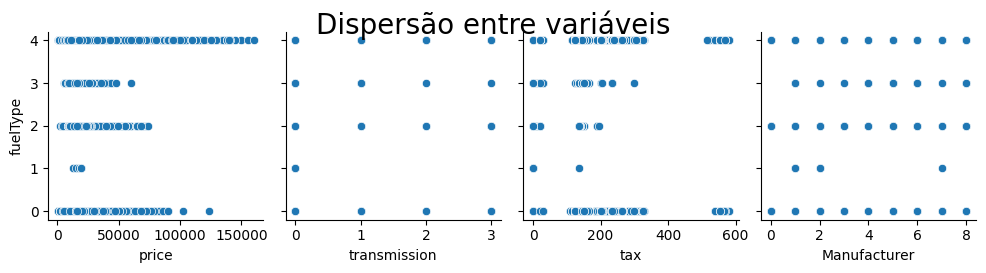

In [19]:
# gráfico de dispersão

ax = sns.pairplot(dados_cleaned, y_vars='fuelType', x_vars=['price','transmission', 'tax', 'Manufacturer'])
ax.fig.suptitle('Dispersão entre variáveis', fontsize=20, y=1.05)
ax


<Axes: >

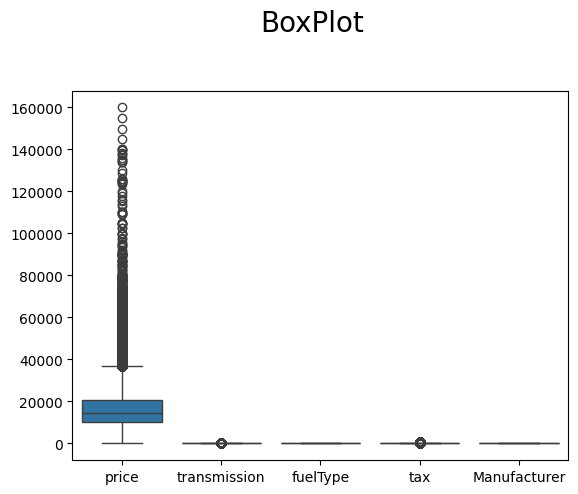

In [20]:
bp = sns.boxplot(dados_cleaned)
plt.suptitle('BoxPlot', fontsize=20, y=1.05)
bp

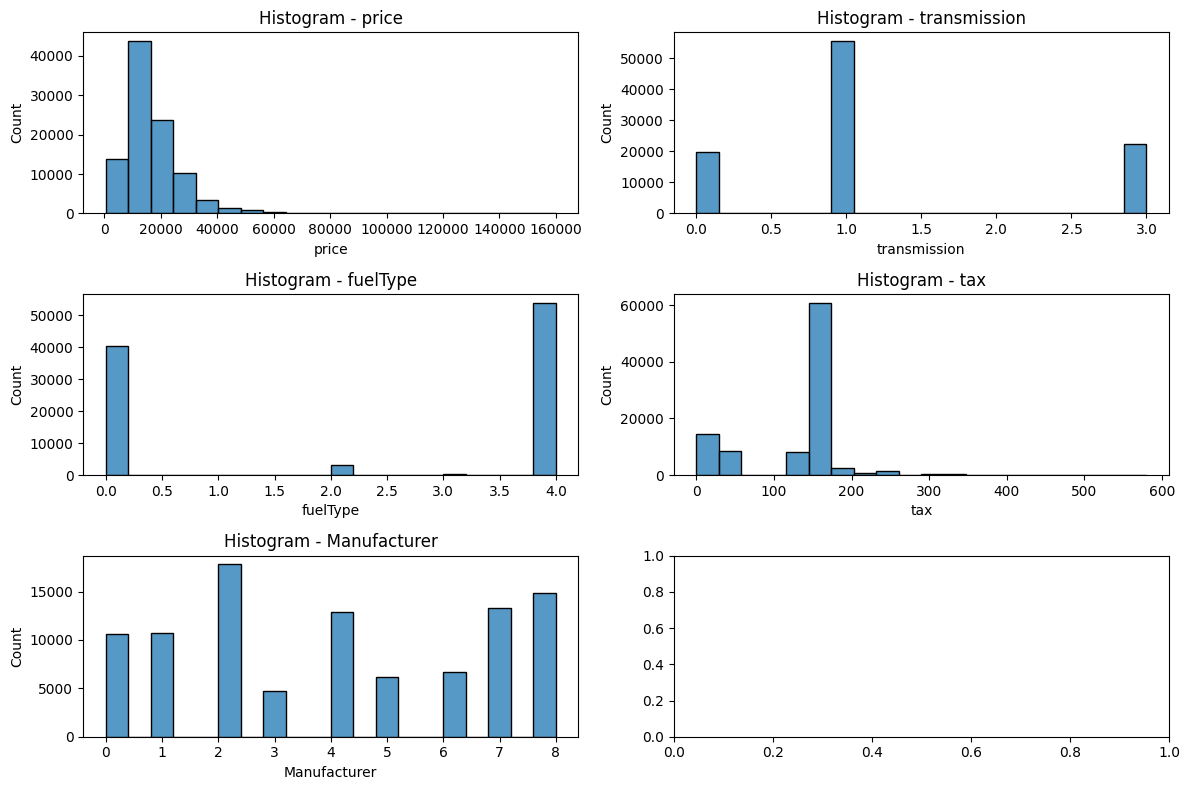

In [21]:
# prompt: generate histogram from dados_cleaned

columns_to_plot = ['price', 'transmission', 'fuelType', 'tax', 'Manufacturer']

# Create a 2x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each column and plot the histogram
for i, column in enumerate(columns_to_plot):
    sns.histplot(dados_cleaned, x=column, bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram - {column}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


# Matriz de Correlação entre variáveis

In [22]:
# matriz de correlação
dados_cleaned.corr().round(4)

,price,transmission,fuelType,tax,Manufacturer
price,1.0000,0.2410,-0.2264,0.3070,-0.2250
transmission,0.2410,1.0000,-0.0611,0.0734,-0.0719
fuelType,-0.2264,-0.0611,1.0000,0.1013,0.1528
tax,0.3070,0.0734,0.1013,1.0000,-0.0505
Manufacturer,-0.2250,-0.0719,0.1528,-0.0505,1.0000


# CRIAR UMA FUNÇÃO PARA TRATAMENTO DE OUTLIERS (SUGESTÃO: utilize IQR)

In [23]:
# prompt: CRIAR UMA FUNÇÃO PARA TRATAMENTO DE OUTLIERS (SUGESTÃO: utilize IQR)

import numpy as np

def remove_outliers_IQR(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])

    df.dropna(inplace=True)
    return df

In [24]:
# remove_outliers_IQR(dados_cleaned)

In [25]:
dados_cleaned

,price,transmission,fuelType,tax,Manufacturer
0,7495,1,4,145,3
1,10989,1,4,145,8
2,27990,3,0,145,1
3,12495,1,0,150,5
4,7999,1,4,125,2
...,...,...,...,...,...
97707,10447,0,4,145,2
97708,14995,1,0,30,1
97709,8950,1,4,125,2
97710,10700,0,4,125,7


# PADRONIZAÇÃO (Standard Scaler) E/OU NORMALIZAÇÃO (MinMaxScaler) DAS COLUNAS

In [26]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# # Standardize the columns of the DataFrame in-place
# dados_cleaned[dados_cleaned.columns] = scaler.fit_transform(dados_cleaned)

# print("DataFrame Padronizado:")
# print(dados_cleaned)


# Separando os dados em features (X) and labels (y)

In [27]:
# Separação dos dados de entrada e dados de saída
# X maiúsculo ----> Dados de entrada / Features / Variáveis independentes
# y minúsculo ----> Dados de saída / Target (alvo) / Variável dependente
# dados.iloc[linhas, colunas]
X = dados_cleaned.iloc[:, [0, 1, 3]] # Todas as linhas e as colunas de 6, 7, 9
X.head()

,price,transmission,tax
0,7495,1,145
1,10989,1,145
2,27990,3,145
3,12495,1,150
4,7999,1,125


In [28]:
X.values

array([[ 7495,     1,   145],
       [10989,     1,   145],
       [27990,     3,   145],
       ...,
       [ 8950,     1,   125],
       [10700,     0,   125],
       [15798,     1,   150]])

In [29]:
# Dados de saída
y = dados_cleaned['fuelType']
y

0        4
1        4
2        0
3        0
4        4
        ..
97707    4
97708    0
97709    4
97710    4
97711    0
Name: fuelType, Length: 97712, dtype: int64

# Separando dados para treinamento e testes

In [30]:
# Separação em dados de treino e dados de teste
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# SEED
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [31]:
X_train.shape

(68398, 3)

In [32]:
X_test.shape

(29314, 3)

# Treinando os modelos (método fit)

In [33]:
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [34]:
SVC_model = SVC()
SVC_model.fit(X_train, y_train)

SVC()

In [35]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

# Testando os modelos (método predict)

In [36]:
# Método Predict
SVC_prediction = SVC_model.predict(X_test)

In [37]:
SVC_prediction

array([0, 4, 4, ..., 4, 4, 4])

In [38]:
KNN_prediction = KNN_model.predict(X_test)

In [39]:
KNN_prediction

array([0, 4, 0, ..., 4, 4, 4])

# Mostrando os resultados

## Algoritmo SVC

### Acuracia (Accuracy)

In [40]:
# Resolvendo problema de "cannot handle a mix of multiclass and continuous targets"
# print(y_test.dtype)
# print(SVC_prediction.dtype)
# y_test = y_test.astype(int)
# print(y_test.dtype)
# print(SVC_prediction.dtype)

In [41]:
acuracia_svc = (accuracy_score(SVC_prediction, y_test)*100)

In [42]:
print(f'Acurácia do modelo SVC: {acuracia_svc: .2f} %')

Acurácia do modelo SVC:  62.13 %


## Confusion Matrix

In [43]:
print(confusion_matrix(SVC_prediction, y_test))

[[ 6942     2   575    48  5054]
 [    0     0     0     0     0]
 [    0     0     0     0     0]
 [    0     0     0     0     0]
 [ 5072     0   321    28 11272]]


## Relatório de classificação

In [44]:
print(classification_report(SVC_prediction, y_test))

              precision    recall  f1-score   support

           0       0.58      0.55      0.56     12621
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.69      0.68      0.68     16693

    accuracy                           0.62     29314
   macro avg       0.25      0.25      0.25     29314
weighted avg       0.64      0.62      0.63     29314



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Algoritmo KNN

### Acuracia (accuracy)

In [45]:
acuracia_knn = (accuracy_score(KNN_prediction, y_test)*100)

In [46]:
print(f'Acurácia do modelo KNN: {acuracia_knn: .2f} %')

Acurácia do modelo KNN:  65.90 %


### Confusion Matrix

In [47]:
print(confusion_matrix(KNN_prediction, y_test))

[[ 6867     0   273    29  4385]
 [    0     0     0     0     0]
 [   75     2   536    15    27]
 [    0     0     0     1     0]
 [ 5072     0    87    31 11914]]


### Relatório de classificação

In [48]:
print(classification_report(KNN_prediction, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.57      0.59      0.58     11554
           1       0.00      0.00      0.00         0
           2       0.60      0.82      0.69       655
           3       0.01      1.00      0.03         1
           4       0.73      0.70      0.71     17104

    accuracy                           0.66     29314
   macro avg       0.38      0.62      0.40     29314
weighted avg       0.66      0.66      0.66     29314



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Utilizando os modelos para fazer uma previsão de classificação

In [49]:
xnew = [[6.7, 2.9, 5],[3, 2, 5]]
ynew = SVC_model.predict(xnew)
ynew

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([4, 4])

In [50]:
xnew = [[6.7, 2.9, 5],[3, 2, 5]]
ynew = KNN_model.predict(xnew)
ynew

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([4, 4])